In [1]:
import pandas as pd
import numpy as np
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys


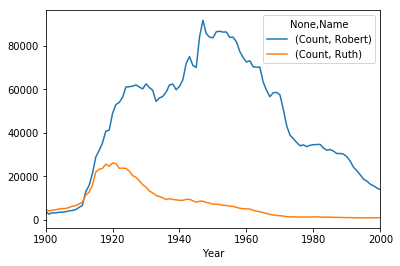

In [2]:
ind = 1900
df_path = []
df = []
i = 0
while ind <= 2000:
    df_path.append('names/' + 'yob' + str(ind) + '.txt')
    df.append(pd.read_csv(df_path[i], header=None, names=['Name', 'Gender', 'Count']))
    df[i]['Year'] = ind
    ind += 1
    i += 1
main_df = pd.concat([item for item in df])
name_1 = main_df[main_df['Name'] == 'Robert']
name_2 = main_df[main_df['Name'] == 'Ruth']
names = pd.concat([name_1, name_2])
out = names.groupby(['Name', 'Year']).sum()
out.unstack('Name').plot()

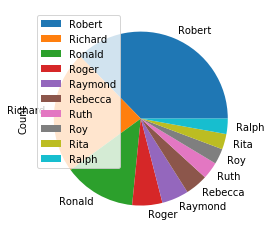

In [3]:
names = pd.read_csv(
    'names/yob1950.txt', 
    names=['Name','Gender','Count']
)
names_r = names[names.Name.str.startswith('R')]
top_names = names_r.groupby(['Name']).sum().sort_values(by='Count', ascending=False).head(10)
top_names.plot(kind='pie', y='Count')

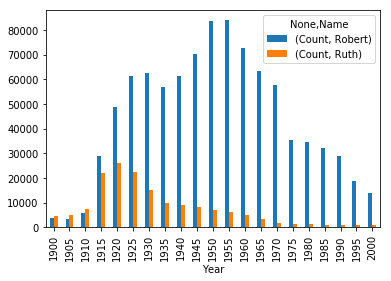

In [4]:
ind = 1900
df_path = []
df = []
i = 0
while ind <= 2000:
    df_path.append('names/' + 'yob' + str(ind) + '.txt')
    df.append(pd.read_csv(df_path[i], header=None, names=['Name', 'Gender', 'Count']))
    df[i]['Year'] = ind
    ind += 5
    i += 1
main_df = pd.concat([item for item in df])
name_1 = main_df[main_df['Name'] == 'Robert']
name_2 = main_df[main_df['Name'] == 'Ruth']
names = pd.concat([name_1, name_2])
out = names.groupby(['Name', 'Year']).sum()
out.unstack('Name').plot(kind = 'Bar')

C:\Users\raravilov\PycharmProjects\jupyterhmwrk\venv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


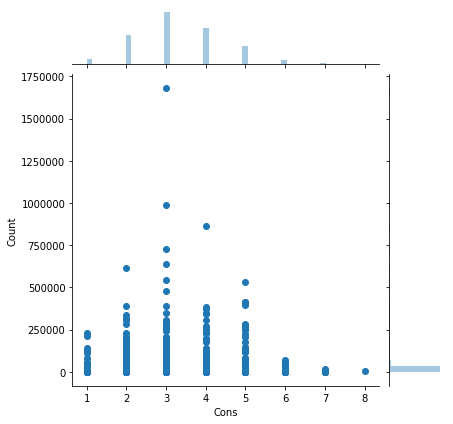

In [9]:
ind = 1900
df_path = []
df = []
i = 0
consonants = 'bcdfghjklmnpqrstvwxz'
for ind in range(1900, 2000):
    df_path.append('names/' + 'yob' + str(ind) + '.txt')
    df.append(pd.read_csv(df_path[i], header=None, names=['Name', 'Gender', 'Count']))
    df[i]['Year'] = ind
 
main_df = pd.concat([item for item in df], ignore_index=True)
out = main_df.groupby(['Name']).sum()
out['Cons'] = 1

for j in range(len(out.index)):
    cons = len(re.findall(r'[bcdfghjklmnpqrstvwxyz]', out.index[j], re.IGNORECASE))
    out.loc[out.index[j], 'Cons'] = cons


sns.jointplot(x='Cons', y='Count', 
              data=out, kind='scatter')